# PREDICTING VODAFONE CUSTOMER CHURN PROJECT

#### **Business Undestanding**

##### **Problem statements**:

Vodafone is currently facing a substantial challenge with customer churn, which negatively impacts its revenue and operational efficiency. The existing approaches to manage churn are predominantly reactive and lack the precision to effectively identify customers at risk of leaving. This inability to predict churn accurately hinders Vodafone's efforts to implement timely and effective retention strategies, resulting in increased costs associated with acquiring new customers and managing churn.

##### **Project Goal and Objectives**:

**Goal:**
Develop a robust machine learning model to accurately predict customer churn at Vodafone, enabling the company to implement preemptive retention strategies and reduce the overall churn rate.

**Objectives:**

1. **Data Analysis:** Conduct a thorough analysis of customer data to identify patterns and factors contributing to churn, including demographics, usage patterns, service quality, and customer support interactions.
2. **Feature Engineering:** Create meaningful features from raw data to improve the predictive power of the churn model.
3. **Model Development:** Build and evaluate various machine learning models to predict customer churn, selecting the best-performing model based on accuracy, precision, recall, and other relevant metrics.
4. **Model Evaluation:** Rigorously assess the performance of the models using appropriate validation techniques and metrics to ensure robustness and reliability.
5. **Actionable Insights:** Provide actionable insights and recommendations based on the model’s predictions to help Vodafone develop targeted retention campaigns and improve customer satisfaction.

##### **Stakeholder**

1. **Customer Retention Team**:
   **Role**: Implement retention strategies based on the model's predictions.

2. **Marketing Team**:
   **Role**: Develop and execute marketing strategies to enhance customer loyalty.
3. **Customer Service Team**:
   **Role**: Address customer concerns and improve service quality.
4. **Data Science and Analytics Team**:
   **Role**: Develop, refine, and validate the churn prediction model.
5. **Vodafone Senior Management**:
   **Role**: Make strategic decisions based on model insights.

These stakeholders will actively use the model to drive decisions and actions that enhance customer retention and loyalty, ultimately contributing to Vodafone's overall business success.

##### **Key Metrics and Success Criteria**

1. **Accuracy**: Proportion of correct predictions.
   **Target**: ≥ 85% (Balanced data)

2. **F1 Score**:
   **Definition**: Harmonic mean of precision and recall.
   **Target**: ≥ 80%.

3. **AUC-ROC**: Discriminative power of the model.
   **Target**: ≥ 0.80.

4. At least 4 baseline models
5. All hyperparameter uning should be only to basedline model if they excedd there F1 score

##### **Features**

There are 17 categorical features:

- CustomerID : Unique identifier for each customer.
- Gender : Gender of the customer (Male, Female).
- SeniorCitizen : Indicates if the customer is a senior citizen (1: Yes, 0: No).
- Partner : Indicates if the customer has a partner (Yes, No).
- Dependents : Indicates if the customer has dependents (Yes, No).
- PhoneService : Indicates if the customer has a phone service (Yes, No).
- MultipleLines : Indicates if the customer has multiple lines (Yes, No, No phone service).
- InternetService : Type of internet service the customer has (DSL, Fiber optic, No).
- OnlineSecurity : Indicates if the customer has online security service (Yes, No, No internet service).
- OnlineBackup : Indicates if the customer has an online backup service (Yes, No, No internet service).
- DeviceProtection : Indicates if the customer has device protection service (Yes, No, No internet service).
- TechSupport : Indicates if the customer has tech support service (Yes, No, No internet service).
- StreamingTV : Indicates if the customer streams TV (Yes, No, No internet service).
- StreamingMovies : Indicates if the customer streams movies (Yes, No, No internet service).
- Contract : The contract term of the customer (Month-to-month, One year, Two years).
- PaperlessBilling: Indicates if the customer uses paperless billing (True, False).
- PaymentMethod: The customer's payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).

Next, there are 3 numerical features:

- Tenure: Number of months the customer has stayed with the company
- MonthlyCharges: The amount charged to the customer monthly
- TotalCharges: The total amount charged to the customer

Finally, there’s a prediction feature:

- Churn: Whether the customer churned or not (Yes or No)

##### **Hypotheses**

**Hypothesis 2: Total Charges**
Higher monthly charges might lead to dissatisfaction among customers, especially if they do not perceive a corresponding value in the service, leading to higher churn rates.

**Null Hypothesis (H0):**
Total charges have no effect on the likelihood of customer churn.

**Alternative Hypothesis (H1):**
Total charges have a significant effect on the likelihood of customer churn.

#### Analtytics Questions

1. Overall Churn Rate:

   What is the overall churn rate in the dataset?

2. Contract Type and Churn:

   What is the distribution of contract types among customers?
   How does the contract type affect the churn rate?

3. Tenure and Churn:

4. What is the distribution of tenure among customers?
   How does tenure affect the churn rate?
5. Monthly Charges and Churn:

   What is the distribution of monthly charges among customers?
   How do monthly charges affect the churn rate?

6. Payment Method and Churn:

   What are the different payment methods used by customers?
   How does the payment method affect the churn rate?

7. Internet Service and Churn:

   What types of internet services are customers using?
   How does the type of internet service affect the churn rate?

Additional Services and Churn (Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, Streaming Movies):

How does the usage of these additional services affect the churn rate?
Senior Citizens and Churn:

What percentage of customers are senior citizens?
How does the churn rate compare between senior citizens and non-senior citizens?
Partners and Churn:

How many customers have partners?
Is there a significant difference in churn rates between customers with and without partners?
Dependents and Churn:

How many customers have dependents?
How does the presence of dependents affect the churn rate?


### Data Undestanding


#### Data Importation


In [292]:
# data manipulation packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import f_oneway
from scipy.stats import ttest_ind
# database conection packages
import pyodbc  
from sqlalchemy import create_engine    
from dotenv import dotenv_values
import warnings
warnings.filterwarnings('ignore')

# Ml libraries
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer, RobustScaler
from sklearn.ensemble import RandomForestClassifier 
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import FunctionTransformer
from numpy import log1p
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
import joblib


In [293]:
# pip install pyodbc, python-dotenv

#### load datasets


In [294]:
# database data
environment_variables = dotenv_values('..\.env')

server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("UID")
password = environment_variables.get("PWD")
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [295]:
connection = pyodbc.connect(connection_string)

In [296]:
# SQL query to fetch data from 'dbo.LP2_Telco_churn_first_3000' table
query = "Select * from dbo.LP2_Telco_churn_first_3000"

# Read data from the SQL query result
LP2_Telco_churn_first_3000 = pd.read_sql(query, connection)
LP2_Telco_churn_first_3000.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2025,1488-PBLJN,Female,False,True,True,72,True,True,Fiber optic,True,...,True,True,True,True,Two year,True,Bank transfer (automatic),116.849998,8477.700195,False
2384,2573-GYRUU,Male,True,True,False,48,True,True,Fiber optic,False,...,True,False,False,True,Month-to-month,True,Credit card (automatic),91.050003,4370.750000,False
914,6024-RUGGH,Male,False,True,True,72,True,True,No,None,...,None,None,None,None,Two year,True,Bank transfer (automatic),25.200001,1798.900024,False
790,7131-ZQZNK,Female,False,True,True,60,False,None,DSL,True,...,True,True,True,True,Two year,False,Credit card (automatic),59.849998,3590.199951,False
730,6439-GTPCA,Female,False,False,False,45,True,True,Fiber optic,False,...,True,True,False,False,Month-to-month,True,Electronic check,87.250000,3941.699951,True


In [297]:
LP2_Telco_churn_first_3000.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Second data


In [298]:
# importing the second dataset
LP2_Telco_churn_second = pd.read_csv('..\data\LP2_Telco-churn-second-2000.csv')
LP2_Telco_churn_second.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
426,8630-QSGXK,Male,0,Yes,No,51,Yes,Yes,DSL,No,...,No,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),75.20,3901.25,No
1968,8685-WHQPW,Female,1,No,No,22,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.40,1692.6,Yes
1195,8111-RKSPX,Male,0,No,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),72.20,305.55,Yes
1722,5481-NTDOH,Female,1,Yes,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),107.05,7142.5,No
1036,8008-ESFLK,Female,0,Yes,No,53,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,110.50,5835.5,No


In [299]:
LP2_Telco_churn_second.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Tesing data


In [300]:
test_data = pd.read_excel('../data/Testing//Telco-churn-last-2000.xlsx')

In [301]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [302]:
test_data['SeniorCitizen'] = test_data['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})
# Convert 'TotalCharges' to float and handle non-convertible values with NaN
test_data['TotalCharges'] = pd.to_numeric(test_data['TotalCharges'], errors='coerce')

In [303]:
# Check for duplicated rows if any in the first 3000 data points
test_data.duplicated().sum()

np.int64(0)

#### Exploratory data analysis(EDA)


In [304]:
# Concatenate the first and second dataset
df = pd.concat([LP2_Telco_churn_first_3000, LP2_Telco_churn_second], ignore_index=True)

df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

- data quality Assessment and Exploratory


In [305]:
# info, duplicates, null values and describe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [306]:
df.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [307]:
df.duplicated().sum()

np.int64(0)

In [308]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.0,0.000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.0,9.000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.4,35.775,70.550003,90.050003,118.650002


In [309]:
df.describe(include= 'object').T

,count,unique,top,freq
customerID,5043,5043,3186-AJIEK,1
gender,5043,2,Male,2559
Partner,5043,4,False,1538
Dependents,5043,4,False,2070
PhoneService,5043,4,True,2731
MultipleLines,4774,5,False,1437
InternetService,5043,3,Fiber optic,2248
OnlineSecurity,4392,5,False,1478
OnlineBackup,4392,5,False,1320
DeviceProtection,4392,5,False,1296


- Key insights

0. Customer ID has no relevant data, need tobe dropped
1. Total Records: The dataset contains a total of 5043 entries.
2. Columns with Missing Values: MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, and StreamingMovies
   TotalCharges has 5 missing values.
   Churn has 1 missing value.
3. Data Types:Most columns are of type object, indicating categorical data.
   SeniorCitizen and tenure are int64 (integer).
   MonthlyCharges is float64 (floating point).
   TotalCharges is currently of type object, but should be float.
   Churn is object but should be converted to numerical (e.g., 0 and 1)
4. NO duplicated found
5. Uniques values in categorical columns needs to be fixed


In [310]:
def check_unique_values(data):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Column '{column}' has {len(unique_values)} unique value(s):")
        print(unique_values)
        print("\n" + "-"*50 + "\n")
check_unique_values(df)

Column 'customerID' has 5043 unique value(s):
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

--------------------------------------------------

Column 'gender' has 2 unique value(s):
['Female' 'Male']

--------------------------------------------------

Column 'SeniorCitizen' has 2 unique value(s):
[0 1]

--------------------------------------------------

Column 'Partner' has 4 unique value(s):
[True False 'No' 'Yes']

--------------------------------------------------

Column 'Dependents' has 4 unique value(s):
[False True 'No' 'Yes']

--------------------------------------------------

Column 'tenure' has 73 unique value(s):
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

--------------------------------------------------

Column 'PhoneService' has 4 unique value(s):
[F

Certainly! Here’s the rephrased version:

**Identified Issues:**

- Many columns contain synonymous values (e.g., the `Partner` column has both 'False' and 'No' to represent the same concept).
- The values in the `MonthlyCharges` and `TotalCharges` columns should have a consistent number of decimal places.
- The `TotalCharges` column should be converted to the float data type.


### Data Preparation


#### Data Cleaning


- Data unifomity


In [311]:
#Converting to numric data type
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors="coerce")
df["TotalCharges"].dtype

dtype('float64')

In [312]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')
df['SeniorCitizen'].dtype

dtype('O')

In [313]:
# Selecting numeric and categorical columns
df = df.drop('customerID', axis=1)
numeric_cols = df.select_dtypes('number').columns
categorical_cols = df.select_dtypes('object').columns

#Formatting numeric columns to 2 decimal places
df[numeric_cols]= df[numeric_cols].round(2)

- categorical columns


In [314]:
#  a function to convert binary values to 'Yes'/'No'
def convert_to_boolean(df, column):

    # Define a nested function to convert individual values
    def convert_value(value): 
        if value == True  or value == 1 :
            return "Yes"
        elif value == False or value == 0:
            return "No"
        else:
            return value
    df[column] = df[column].apply(convert_value)
    return df


# Invoke function to convet for all columns in data
for col in categorical_cols:
    df = convert_to_boolean(df, col)

**Cleaning the Tenure Column**

- Upon inspection, some rows in the `Tenure` column have a value of 0. These same rows also have `Churn` marked as False and missing `TotalCharges` values. Since `TotalCharges` is calculated as the product of `Tenure` and `MonthlyCharges`, it is unusual for customers with a tenure of 0 months to not have churned. Given this inconsistency, we will delete these rows to ensure data accuracy.


In [315]:
# Inspecting the `tenure` column
df[df["tenure"] == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,No,Yes,Yes,0,No,None,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,No,No,Yes,0,Yes,No,No,None,None,None,None,None,None,Two year,No,Mailed check,20.25,NaN,No
936,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,No,Yes,Yes,0,Yes,Yes,No,None,None,None,None,None,None,Two year,No,Mailed check,25.75,NaN,No
1340,Female,No,Yes,Yes,0,No,None,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3218,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
4670,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No
4754,Male,No,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No


- handle NAN values with Median() with in tenure and totalcharges columns


In [316]:
# Replace NaN with the median
df['tenure'] = df[['tenure']].applymap(lambda x: df['tenure'].median() if pd.isnull(x) else x)

In [317]:
df['TotalCharges'] = df[['TotalCharges']].applymap(lambda x: df['TotalCharges'].median() if pd.isnull(x) else x)

Handle missing values


In [318]:
#Checking missing valuesdf.isnull().sum()   
df.isnull().sum()

gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          0
Churn                 1
dtype: int64

**key Insights :**

- Since `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, and `MultipleLines` are categorical columns, instead of dropping these columns or imputing missing values with the mode, we will replace them with 'No internet service' or 'No phone service' as appropriate. This approach is based on the assumption that if an entry for a 'No' or 'Yes' question is missing, it likely indicates that the customer does not have that particular service. This assumption is reasonable and practical.

- The row with the missing `Churn` value will be dropped.


In [319]:
# fill the null categorical values with 'False'
cols_to_replace = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Replace NaN with 'No internet service' 
df[cols_to_replace] = df[cols_to_replace].applymap(lambda x: 'No internet service' if pd.isnull(x) else x)

# Replace NaN with 'No phone service' in the MultipleLines 
df['MultipleLines'] = df[['MultipleLines']].applymap(lambda x: 'No phone service' if pd.isnull(x) else x)

#Dropping the missing value churn 
df=df.dropna(axis=0,subset=["Churn"])

In [320]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5042 entries, 0 to 5042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5042 non-null   object 
 1   SeniorCitizen     5042 non-null   object 
 2   Partner           5042 non-null   object 
 3   Dependents        5042 non-null   object 
 4   tenure            5042 non-null   int64  
 5   PhoneService      5042 non-null   object 
 6   MultipleLines     5042 non-null   object 
 7   InternetService   5042 non-null   object 
 8   OnlineSecurity    5042 non-null   object 
 9   OnlineBackup      5042 non-null   object 
 10  DeviceProtection  5042 non-null   object 
 11  TechSupport       5042 non-null   object 
 12  StreamingTV       5042 non-null   object 
 13  StreamingMovies   5042 non-null   object 
 14  Contract          5042 non-null   object 
 15  PaperlessBilling  5042 non-null   object 
 16  PaymentMethod     5042 non-null   object 
 17  

In [322]:
# save the cleaned data 
# df.to_csv('..\data\dfCleaned.csv',index=False)


- Detect outliers only for the numerical columns


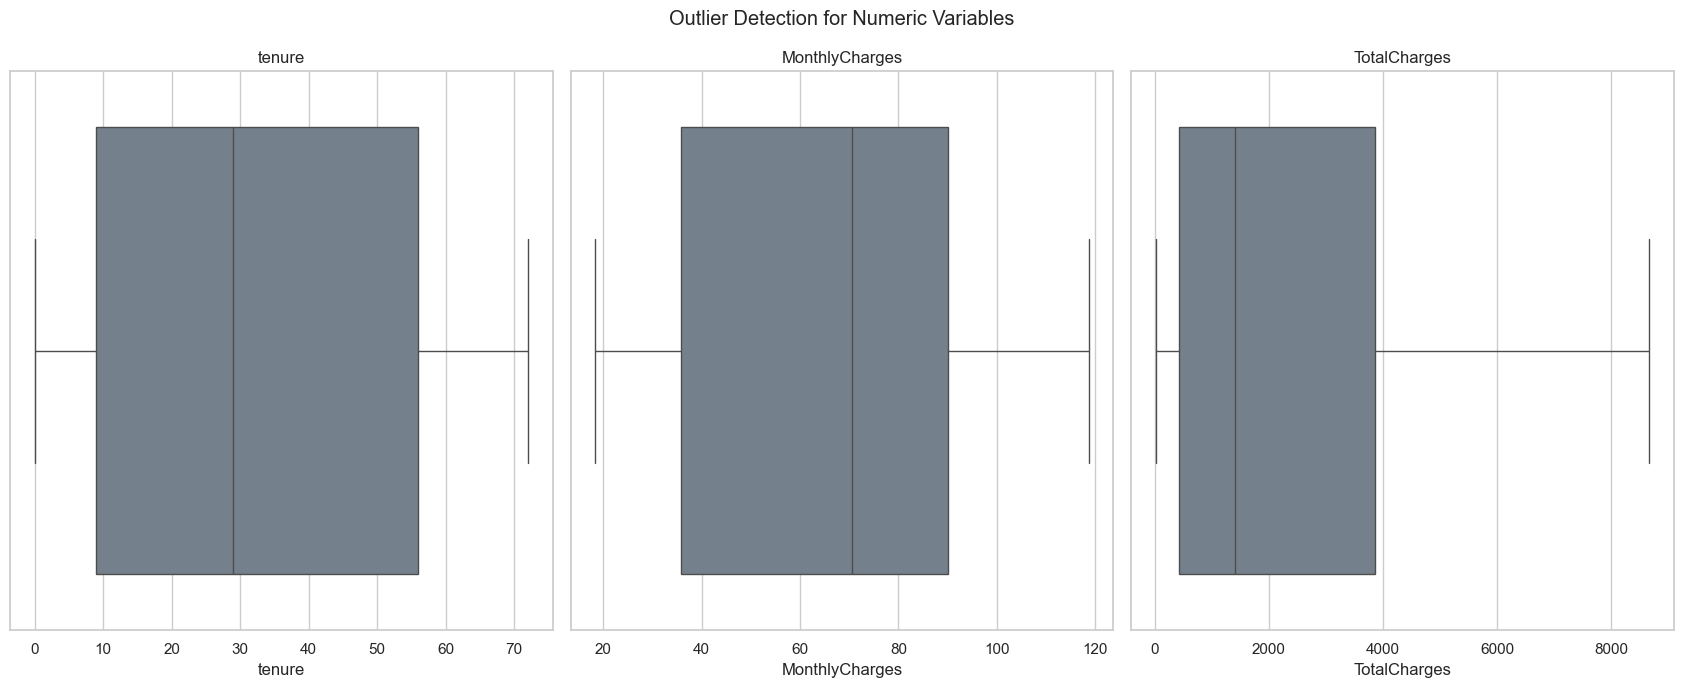

In [323]:
fig, axes = plt.subplots(ncols=len(numeric_cols), figsize=(17, 7), )

# Loop through numeric columns 
for i, col in enumerate(numeric_cols):
    if df[col].dtype in ['int64', 'float64']:  # column is numeric
        sns.boxplot(x=df[col], ax=axes[i], color='slategrey')
        axes[i].set_title(col)
    else:
        axes[i].axis('off')  # exlude non-numeric columns
        print(f"Column '{col}' is not numeric and will not be plotted.")


title = fig.suptitle('Outlier Detection for Numeric Variables')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

**Observations from Outlier Analysis**

- Our numerical columns are within the expected range, with no outliers detected.
- However, `TotalCharges` and `MonthlyCharges` exhibit skewness.

  `TotalCharges` is positively skewed, with a tail extending towards larger values (up to 4000). Consequently, the mean is greater than the median, which in turn is greater than the mode.

  `MonthlyCharges` is negatively skewed, with a tail extending towards smaller values (around 40). This indicates that the mean is less than the median, which is also less than the mode.

- The `tenure` column approximates a normal distribution.


In [324]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,5042,2,Male,2558,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,5042,2,No,4223,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner,5042,2,No,2585,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,5042,2,No,3481,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,5042.0,NaN,NaN,NaN,32.568822,24.525954,0.0,9.0,29.0,56.0,72.0
PhoneService,5042,2,Yes,4553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,5042,3,No,2424,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,5042,3,Fiber optic,2247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,5042,3,No,2507,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineBackup,5042,3,No,2231,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [325]:

cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')
Numerical Variables:
['tenure', 'MonthlyCharges', 'TotalCharges']


### Univariate analysis


**EDA of Numeric Variables**


- key insights

**Tenure**: The customer tenure data is fairly spread out, with many customers having relatively short to moderate tenures, and a few long-term customers.

**Monthly Charges**: The monthly charges are widely spread with a concentration of lower values, indicating a negatively skewed distribution.

**Total Charges**: The total charges show a wide range and a positively skewed distribution, with higher values extending towards the maximum observed total charge.


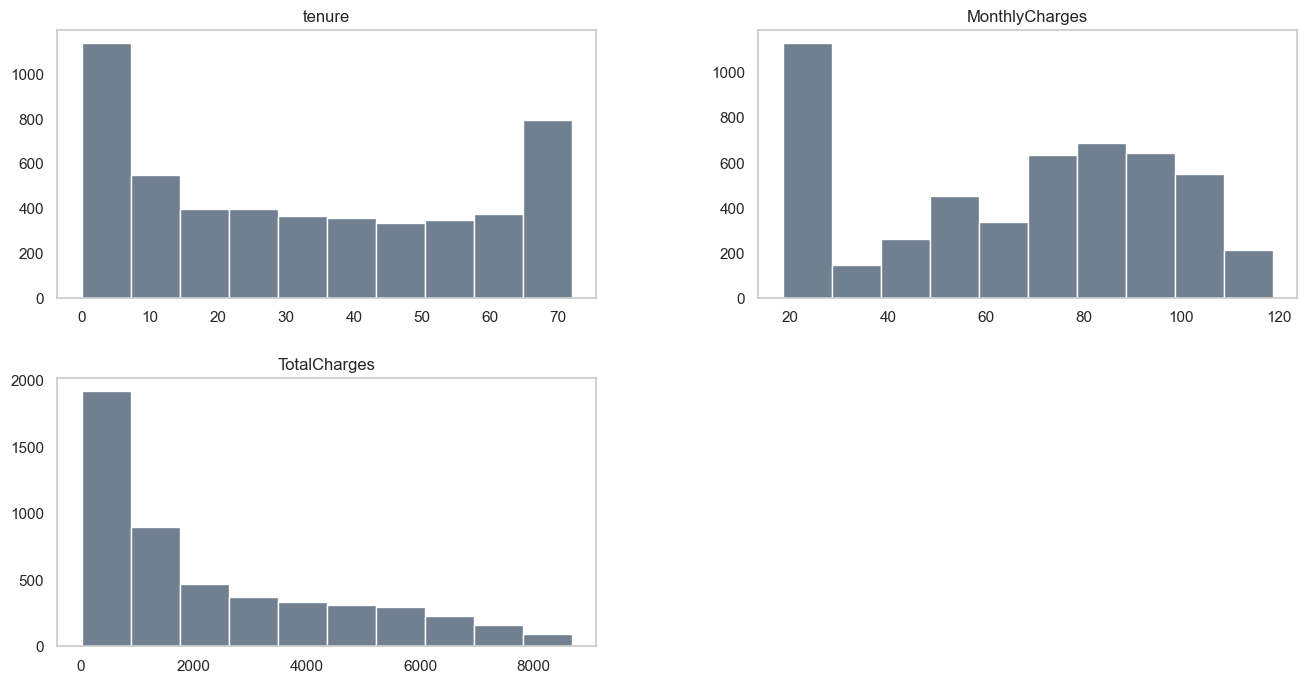

In [326]:
# 'Distribution of  Numerical features'
df.hist(figsize=(16,8), grid=False, color='slategrey')
plt.show()

### Key Notes from Distribution of Numerical Features Visualizations

1. **Tenure Distribution:**

   - High concentration of customers less than 5 months tenure.
   - Uniform distribution for tenures between 10 and 60 months.
   - Peak at the maximum tenure of 72 months.

2. **Monthly Charges Distribution:**

   - High concentration of customers with low monthly charges around $20.
   - Even distribution between $40 and $100.
   - Noticeable drop-off after $100.

3. **Total Charges Distribution:**
   - High concentration of customers with low total charges.
   - Positively skewed with a long tail.


**EDA of categorical Variables**


In [327]:
# distribution

df[categorical_cols].describe()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,5042,5042,5042,5042,5042,5042,5042,5042,5042,5042,5042,5042,5042,5042,5042,5042,5042
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,2558,4223,2585,3481,4553,2424,2247,2507,2231,2219,2471,2018,1981,2744,2995,1699,3706


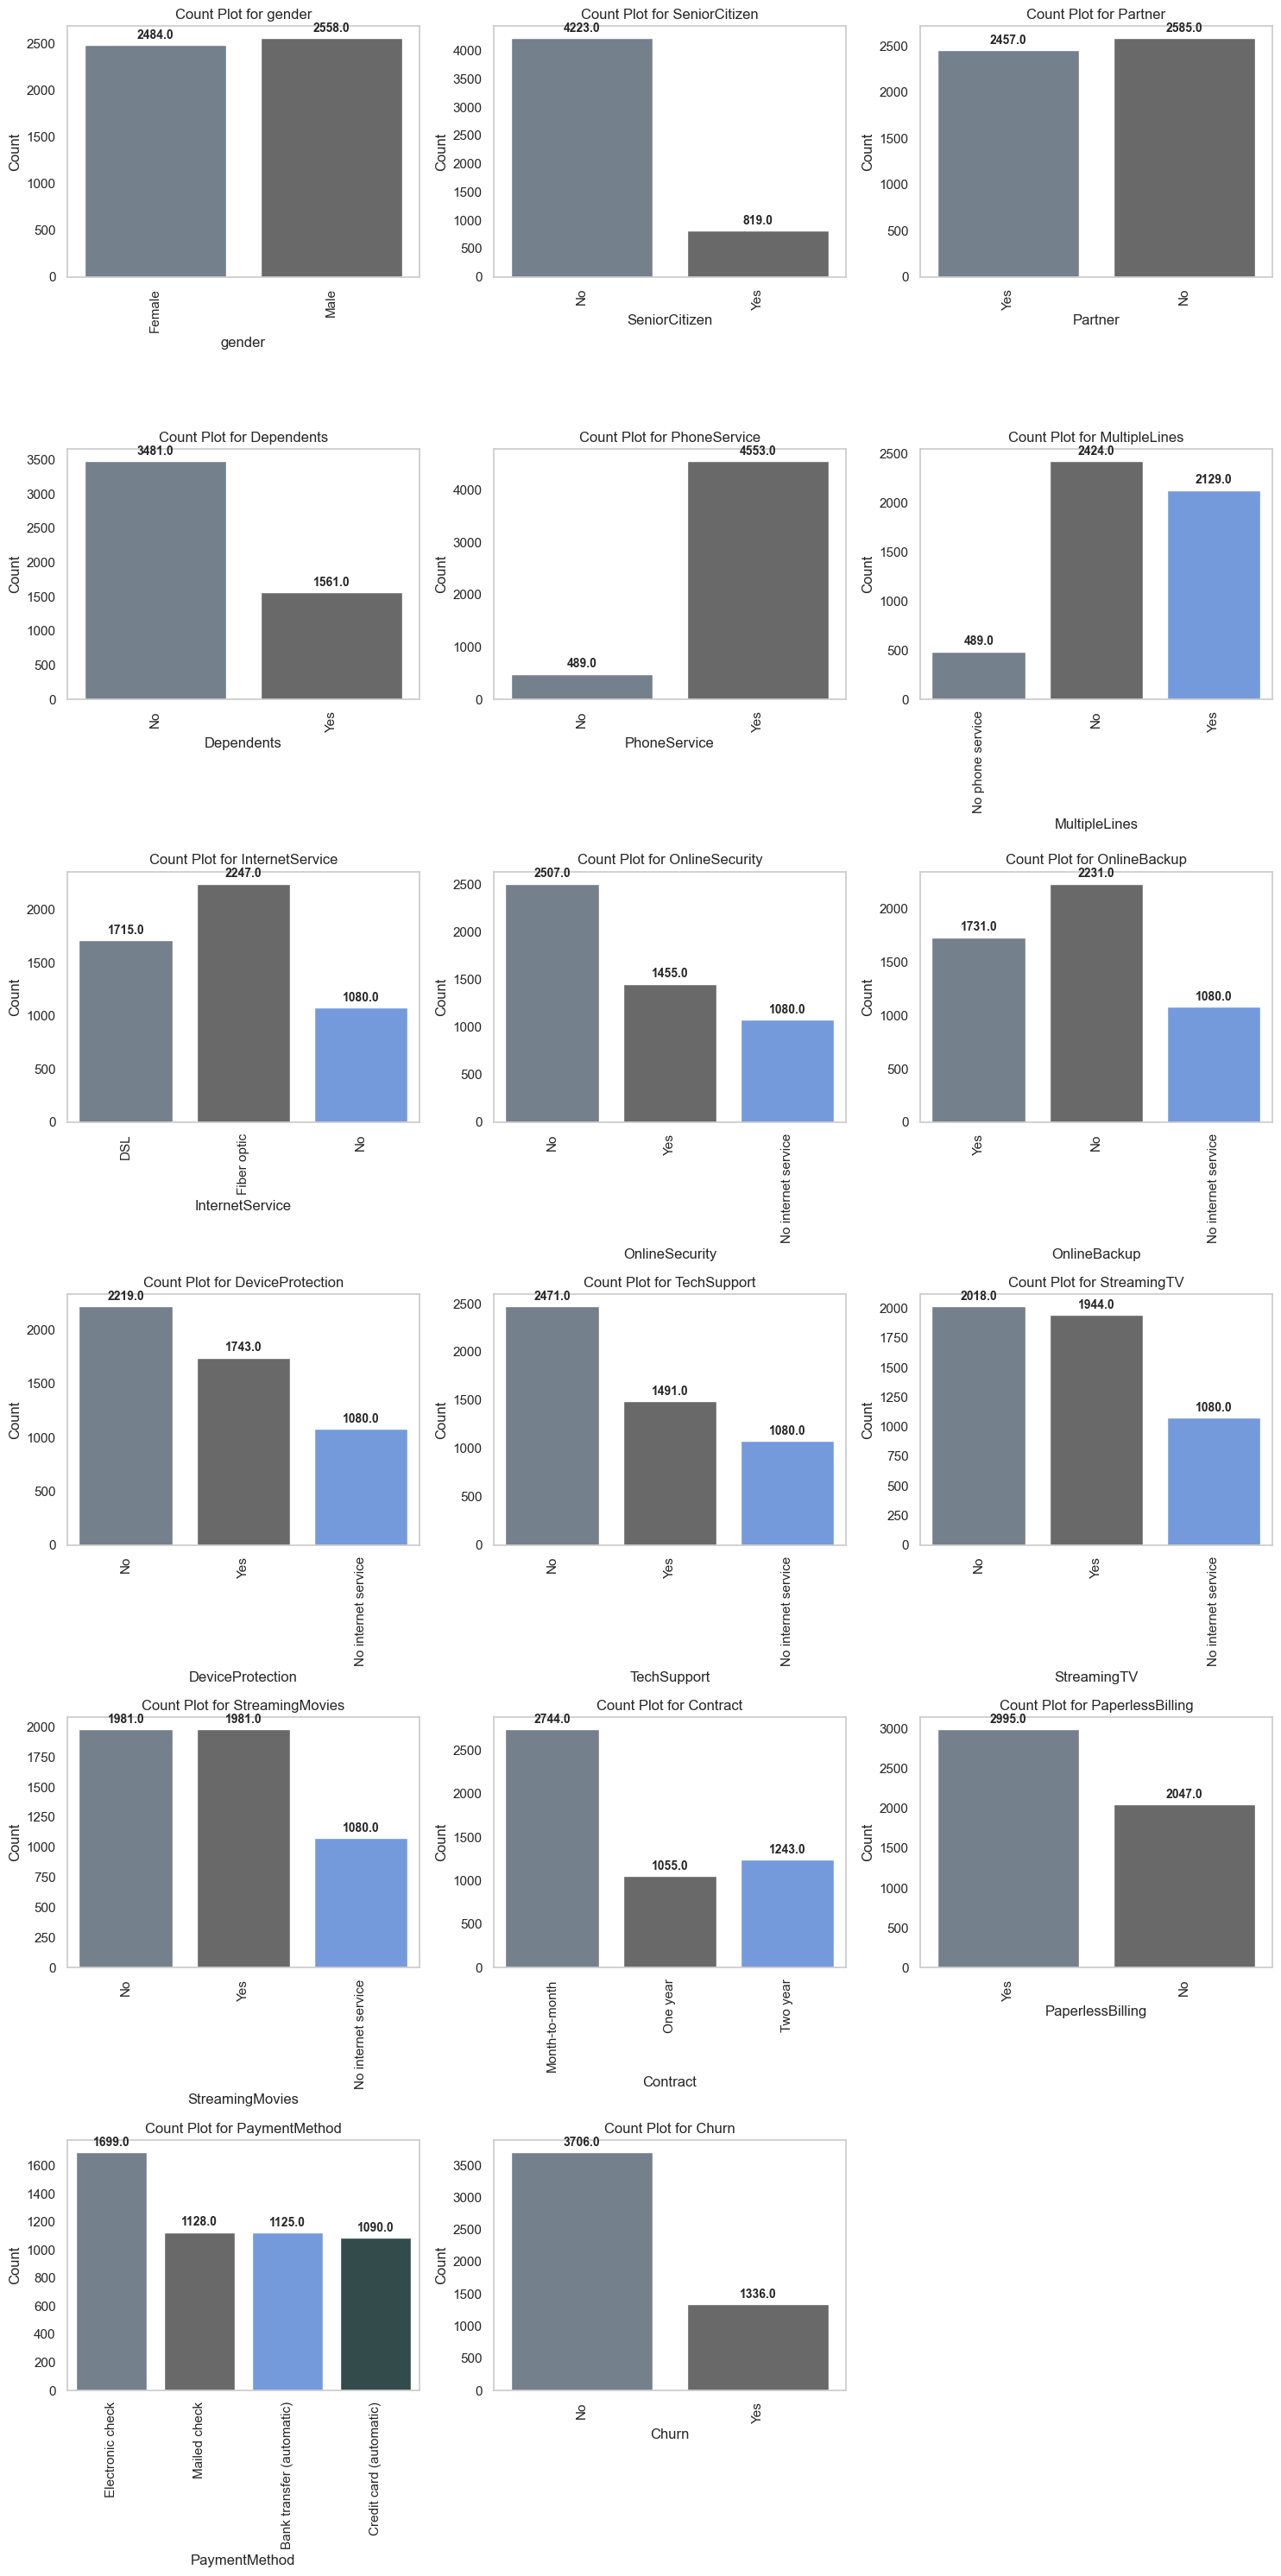

In [328]:

num_cols = 3
num_rows = (len(categorical_cols) - 1) // num_cols + 1


sns.set(style="whitegrid")
plt.figure(figsize=(5 * num_cols, 5 * num_rows))
colors=['slategrey', 'dimgrey', 'cornflowerblue','darkslategray']
for i, col in enumerate(categorical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    ax = sns.countplot(x=col, palette=colors ,data=df[categorical_cols])
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Count Plot for {col}")
    plt.xticks(rotation=90)

    #  values 
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', xy=(p.get_x() + p.get_width() / 2, height),
                    xytext=(0, 3),  #vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, fontweight='bold')
    plt.grid(False)

plt.tight_layout()  # subplot spacing
plt.show()

1. **Gender:**

   - Gender indicates whether customers are male or female.
   - Males account for 51% of the customers, outnumbering females.

2. **Senior Citizen:**

   - The majority of customers are not senior citizens.
   - Only 819 out of 5042 customers (about 16%) are senior citizens.

3. **Partner:**

   - Customers without partners slightly outnumber those with partners.
   - The difference is just 128 customers.

4. **Dependents:**

   - Indicates whether a customer has dependents.
   - 3481 customers have no dependents, making up the majority.

5. **Phone Service:**

   - Indicates whether a customer has subscribed to phone service.
   - 4553 customers, representing 90%, have subscribed to phone service.

6. **Multiple Lines:**

   - Indicates whether a customer has multiple lines.
   - 2693 customers did not have multiple lines, outweighing the other options.

7. **Internet Service:**

   - Pertains to whether a customer opted for DSL, fiber optic, or no internet service.
   - 2247 customers subscribed to fiber optic, making it the most popular option.

8. **Online Security:**

   - Indicates whether a customer adopted the online security service.
   - 3158 customers did not subscribe to online security.

9. **Online Backup:**
   - Indicates whether a customer subscribed to online backup.
   - 2882 out of 5042 customers did not subscribe to online backup.


- probability of churning


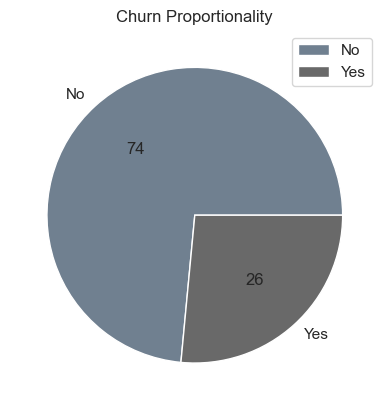

In [329]:
plt.pie(df.Churn.value_counts(), colors=colors,
        labels= ['No', 'Yes'],
        autopct='%.f', normalize=True)
plt.title('Churn Proportionality')
plt.legend()
plt.show()

**Conclusion on the Churn rate**

- There are 3706 customers that remained in the company which is 74% of the customers while 1334 (26% of the customers) churned meaning the retention rate is higher than the churn rate.
- There is also a class imbalance in the target variable as there is unequal distribution of classes in the dataset. This issue will later be addressed as the machine learning classifier tends to be more biased towards the majority class, causing bad classification of the minority class


### Bivariate and Multivariable Analysis


<Figure size 1300x1000 with 0 Axes>

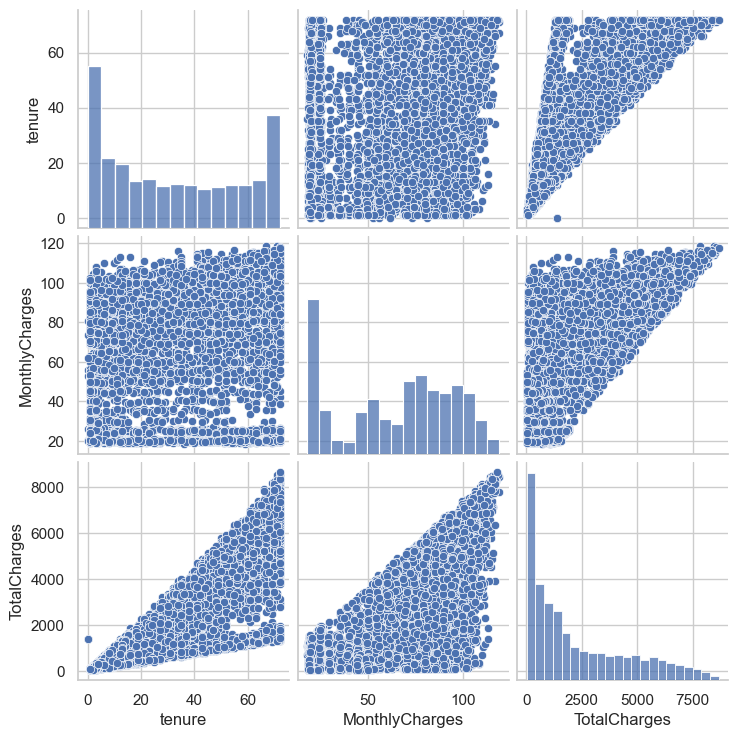

In [330]:
# the relationship between two Categorical variables
plt.figure(figsize=(13,10))
sns.pairplot(data=df.drop(['Churn'],axis=1),palette='slategrey')
plt.show()

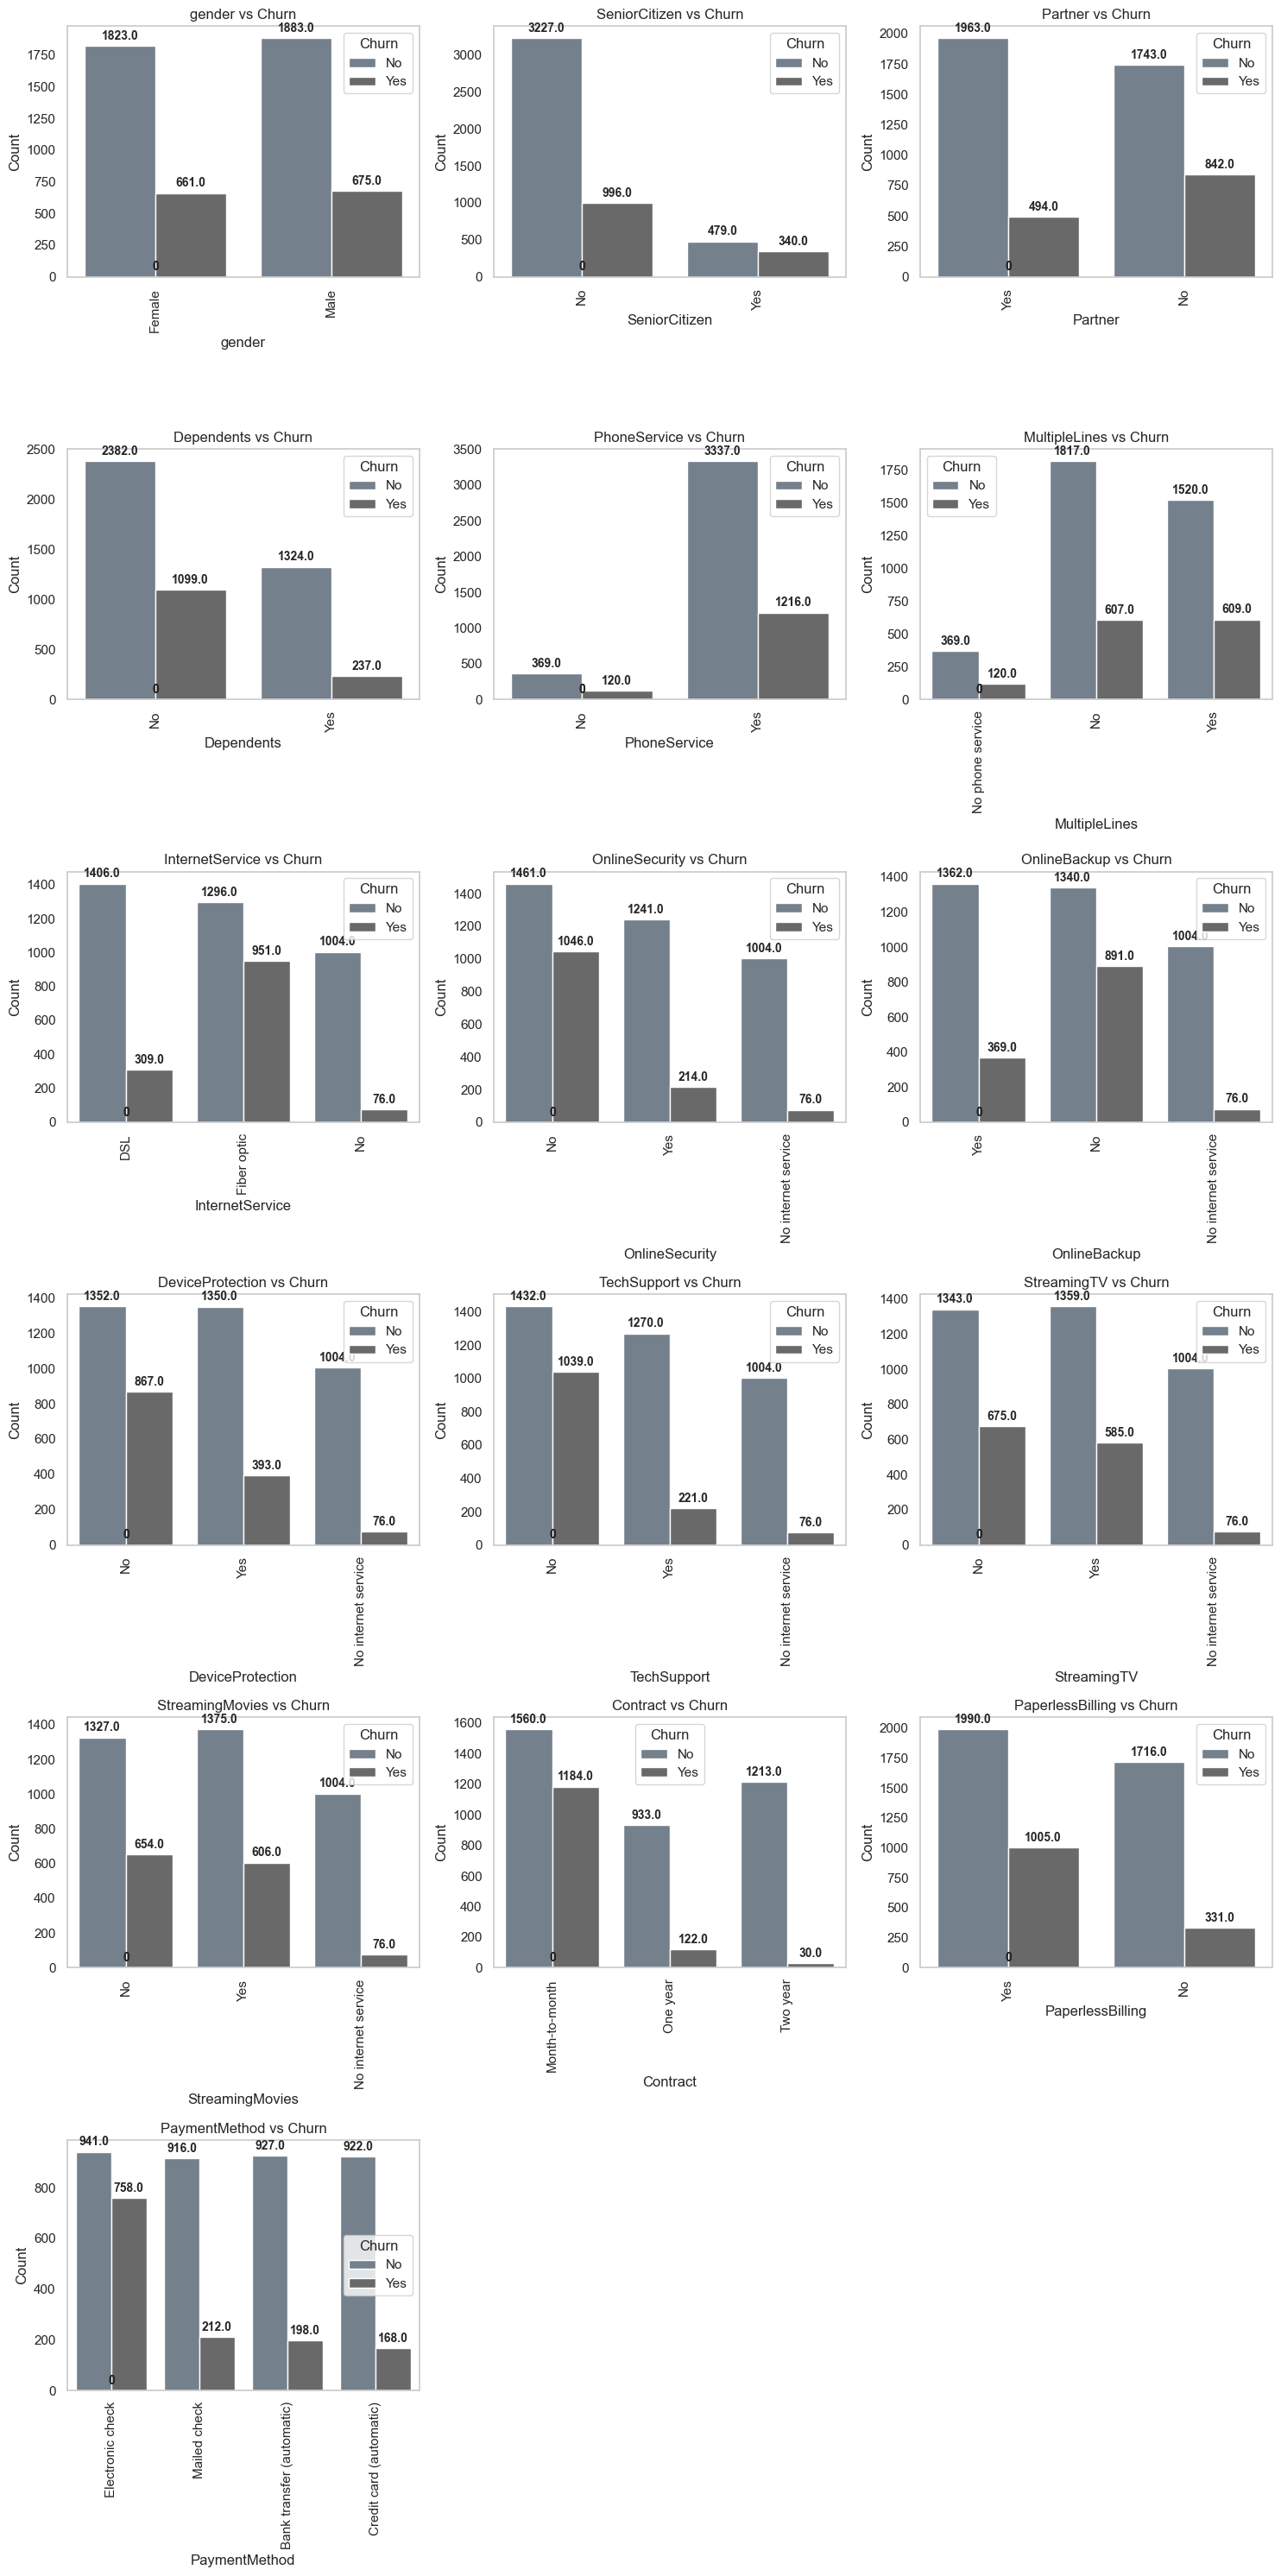

In [331]:
categorical_variable = categorical_cols.drop('Churn')
num_cols = 3
num_rows = (len(categorical_variable) - 1) // num_cols + 1

sns.set(style="whitegrid")
plt.figure(figsize=(5 * num_cols, 5 * num_rows))

for i, col in enumerate(categorical_variable):
    plt.subplot(num_rows, num_cols, i + 1)
    ax = sns.countplot(x=col, hue='Churn',palette=colors ,data=df)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=90)

    # Annotate values
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', xy=(p.get_x() + p.get_width() / 2, height),
                    xytext=(0, 3),  # vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, fontweight='bold')
    plt.grid(False)

plt.tight_layout()  # subplot spacing
plt.show()

### Key insights Visuals

- **Gender:** Males exhibit a higher likelihood of both leaving and staying with the company compared to females.
- **Senior Citizens:** More senior citizens tend to stay with the company rather than leave.
- **Partner Status:** Customers with partners are more likely to stay, while those without partners are more likely to leave.
- **Dependents:** Customers without dependents are more likely to leave the company, whereas those with dependents tend to stay.
- **Phone Service:** Having phone service significantly influences whether a customer will churn.
- **Multiple Lines:** Customers using multiple lines are more likely to remain with the company compared to those without multiple lines.
- **Internet Service:** The majority of customers who stay use DSL internet service.
- **Online Security:** Customers who do not use online security are more likely to stay with the company.
- **Online Backup:** The usage of online backup services does not significantly impact customer retention, as many customers who stay do not utilize these services.
- **Technical Support:** The availability of technical support affects customer retention; those who do not use technical support have high rates of both staying and leaving.
- **Contract Period:** The length of the contract term influences churn rates; shorter contract terms correlate with higher churn rates.
- **Paperless Billing:** Customers using paperless billing are less likely to churn.
- **Payment Method:** Customers who use electronic checks as their payment method are more likely to leave the company.


EDA Multivariate Analysis


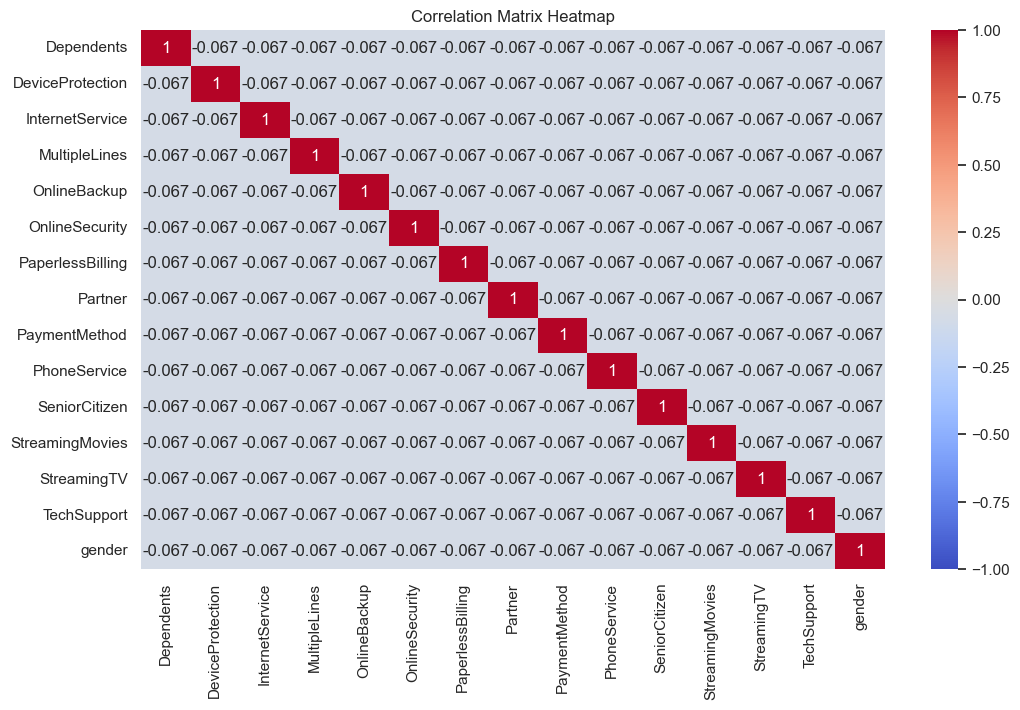

In [332]:

df_encoded = pd.get_dummies(categorical_variable, drop_first=True)

corr_matrix = df_encoded.corr()
plt.figure(figsize=(12, 7))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

- Key Insights

The heatmap indicates that the categorical variables in your dataset have weak linear correlations with each other. This suggests that they provide largely independent information, which can be valuable for predictive modeling.

`Feature Engineering:`

Since the variables appear to be largely independent, each variable may provide unique information that can be valuable for predictive modeling. Ensure that you do not drop any variable solely based on the correlation heatmap.

`Modeling Approach:`

We will use the algorithms that can handle and benefit from potentially non-linear relationships and interactions, such as decision trees, random forests, or gradient boosting machines.


### Hypothesis Testing


**Hypothesis 1: Monthly Charges**

**Null Hypothesis (H0):**
Monthly charges have no effect on the likelihood of customer churn.

**Alternative Hypothesis (H1):**
Monthly charges have a significant effect on the likelihood of customer churn.


In [333]:

from scipy.stats import f_oneway
from scipy import stats
from scipy.stats import ttest_ind
# Separate data into two groups based on churn status
Yes = df[df['Churn'] == 'Yes']['MonthlyCharges']
No= df[df['Churn'] == 'No']['MonthlyCharges']

# Perform a t-test
t_statistic, p_value = ttest_ind(Yes, No, equal_var=False)

# Print results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Determine significance based on p-value
if p_value < 0.05:
    print("Reject null hypothesis: MonthlyCharges has a significant empact on churning customers.")
else:
    print("Fail to reject null hypothesis: MonthlyCharges does no significant empact on churning customers.")


T-Statistic: 16.38602030210962
P-Value: 7.606640169993475e-58
Reject null hypothesis: MonthlyCharges has a significant empact on churning customers.


Conclude that there is a significant relationship between `MonthlyCharge` and churn rates. The negative t-statistic indicates that the average`MonthlyCharge` for customers who have churned is significantly lower than that for customers who have not churned.


### Data Preparation


1. Split the dataset into X and y test features


In [334]:
# Replace None values in the 'Churn' column with 'No'
df['Churn'] = df['Churn'].fillna('No')

X = df.drop('Churn', axis=1)
y = df['Churn']

2. Split data set into training and evaluation sets


In [341]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Engineering


In [342]:
# Separating input features into numeric and categorical for different pipelines
numeric_column = X.select_dtypes(include=['number']).columns
numeric_column

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [343]:
categorical_column = X.select_dtypes(include=['object']).columns
categorical_column

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

Define LogTransformer


In [344]:


class LogTransformer:
    def __init__(self, constant=1e-5):
        self.constant = constant

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return np.log1p(X + self.constant)

Create Pipelines


In [345]:

# Numeric pipeline
numerical_pipeline = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('log_transformation', FunctionTransformer(LogTransformer().transform)),
    ('scaler', RobustScaler()),
])

# Categorical pipeline
categorical_pipeline = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore')),
])

# Combine the numeric and categorical pipelines using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('numerical_pipeline', numerical_pipeline, numeric_column),
    ('categorical_pipeline', categorical_pipeline, categorical_column),
])

### Label Encoding


In [346]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the training set
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform the testing set using the fitted label encoder
y_test_encoded = label_encoder.transform(y_test)

### Modeling and Evaluation


1. Decision Tree


In [347]:
from sklearn.tree import DecisionTreeClassifier

#  a pipeline with preprocessor and DecisionTreeClassifier
decision_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Fit the pipeline to the training data
decision_tree_pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x000002CCB897B850>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges']...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

2.Random Forest Classifier


In [348]:
from sklearn.ensemble import RandomForestClassifier
# Create a pipeline with preprocessor and RandomForestClassifier
random_forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the pipeline to the training data
random_forest_pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x000002CCB897B850>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges']...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

3. Kneighbors Classidier


In [349]:
from sklearn.neighbors import KNeighborsClassifier
#A pipeline with preprocessor and KNeighborsClassifier
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Fit the pipeline to the training data
knn_pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x000002CCB897B850>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges']...
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', KNeighborsClassifier())])

4. Logistic Regression


In [350]:
from sklearn.linear_model import LogisticRegression

#  a pipeline for Logistic Regression
logistic_regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Fit the pipeline to the training data for Logistic Regression
logistic_regression_pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x000002CCB897B850>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges']...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', LogisticRegression(random_state=42))])

5. Gaussian Naive Bayes


In [351]:
from sklearn.naive_bayes import GaussianNB
# A pipeline for Gaussian Naive Bayes
naive_bayes_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

# Fit the pipeline to the training data for Gaussian Naive Bayes
naive_bayes_pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x000002CCB897B850>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges']...
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', GaussianNB())])

Models comparison by Classification report on Unbalanced


In [352]:
# Define the models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Gaussian Naive Bayes':GaussianNB(),
}

Classification report (Unbalanced)


In [353]:
from sklearn.metrics import classification_report
# DataFrame to store evaluation metrics for models
unbalanced_metrics = pd.DataFrame(columns=['Model_name', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Iterate over models dictionary, where each item is a model_name: classifier pair
for model_name, classifier in models.items():
    # a pipeline with preprocessing steps and the current classifier
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', classifier)])
    
    # Fit the pipeline to the training data
    pipeline.fit(X_train, y_train_encoded)
    
    #predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    #  classification metrics using the classification_report
    metrics = classification_report(y_test_encoded, y_pred, output_dict=True)
    
    # Extract individual metrics for evaluation
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score = metrics['weighted avg']['f1-score']
    
    # Append the model's evaluation metrics to the DataFrame
    unbalanced_metrics.loc[len(unbalanced_metrics)] = [model_name, accuracy, precision, recall, f1_score]



In [354]:
unbalanced_metrics


,Model_name,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.739346,0.757364,0.739346,0.746631
1,Random Forest,0.816650,0.811946,0.816650,0.813882
2,K Nearest Neighbors,0.774034,0.779044,0.774034,0.776334
3,Logistic Regression,0.818632,0.814802,0.818632,0.816445
4,Gaussian Naive Bayes,0.677899,0.810989,0.677899,0.699662


    Overview Insight

1. Logistic Regression performs very well with high and balanced precision and recall, indicating it is robust against the class imbalance and accurately captures both majority and minority class instances.
2. Gaussian Naive Bayes:the lowest accuracy and recall but high precision, suggesting it is very cautious in predicting the minority class, likely leading to fewer false positives but more false negatives.

   - Recommendations

Logistic Regression and Random Forest: These models perform best across all metrics and handle class imbalance well, making them suitable choices for unbalanced datasets. They have high precision, recall, and F1 score, indicating their ability to predict both classes effectively.

Gaussian Naive Bayes: Despite high precision, the low recall and accuracy suggest it may not be suitable for scenarios where capturing minority class instances is critical. It may be useful if the cost of false positives is high and false negatives are less critical.

KNN and Decision Tree: These models offer moderate performance and could be considered if computational resources or interpretability are more critical. However, they may need further tuning or balancing techniques (e.g., SMOTE, class weighting) to improve their performance on unbalanced data.


Model Selection

The best model choice depends on your specific priorities and the dataset's characteristics. Consider the trade-offs between accuracy, precision, and recall in your context. Further Evaluation: Investigate confusion matrices and ROC curves for more detailed insights into model performance. Hyperparameter Tuning: Optimize model performance by tuning hyperparameters for each algorithm.


Balanced Dataset


In [355]:

y_train.value_counts()

Churn
No     2947
Yes    1086
Name: count, dtype: int64

- As shown above, the data is not balanced, with 'No' being the majority class.
- Unbalanced data can cause machine learning models to be biased towards the majority class, negatively affecting overall performance.
- To mitigate these challenges, techniques such as resampling (oversampling the minority class or undersampling the majority class) can be employed.


Balancing by Resampling by applying RandomOverSampler


In [356]:
from imblearn.over_sampling import RandomOverSampler
#Balance data by oversampling

sampler = RandomOverSampler(random_state=42)
# Fit and apply RandomOverSampler to the training data
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train, y_train_encoded)

In [357]:
#checking if data is balanced
pd.DataFrame(y_train_resampled).value_counts()

0
0    2947
1    2947
Name: count, dtype: int64

- I chose oversampling because it addresses the minority class scarcity in small datasets by generating additional instances, thereby improving the model's exposure to meaningful patterns.
- Oversampling preserves the original features' integrity, ensuring no valuable information is lost during the modeling process.


Classification report after balancing data to see check Improvement of our models


In [358]:
balanced_metrics = pd.DataFrame(columns=['Model_name', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

for model_name, classifier in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', classifier)])
    
    # Fit the pipeline to the training data (resampled)
    pipeline.fit(X_train_resampled, y_train_resampled)
    
    #  predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    #  classification metrics using the classification_report
    metrics = classification_report(y_test_encoded, y_pred, output_dict=True)
    
    # metrics for evaluation
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score = metrics['weighted avg']['f1-score']
    
    # Append the model's evaluation metrics to the DataFrame
    balanced_metrics.loc[len(unbalanced_metrics)] = [model_name, accuracy, precision, recall, f1_score]


In [359]:
balanced_metrics

,Model_name,Accuracy,Precision,Recall,F1 Score
5,Gaussian Naive Bayes,0.666006,0.807405,0.666006,0.688317


Balancing data using SMOTE, training it and comparing results


In [360]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
# Initialize an empty DataFrame to store results
smote_df = pd.DataFrame(columns=['Model_name', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])

# Iterate over each model and apply SMOTE during training
for model_name, classifier in models.items():
    # Create a pipeline with preprocessing, SMOTE, and the classifier
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', classifier)
    ])
    
    # Fit the pipeline to the training data
    pipeline.fit(X_train, y_train_encoded)
    
    # Make predictions on the test data
    smote_y_pred = pipeline.predict(X_test)
    
    # Calculate classification metrics using classification_report
    smote_dict = classification_report(y_test_encoded, smote_y_pred, output_dict=True)
    
    # Extract relevant metrics
    accuracy = smote_dict['accuracy']
    precision = smote_dict['weighted avg']['precision']
    recall = smote_dict['weighted avg']['recall']
    f1_score = smote_dict['weighted avg']['f1-score']
    
    # Append the results to the DataFrame
    smote_df.loc[len(smote_df)] = [model_name, accuracy, precision, recall, f1_score]

# Print the results DataFrame
print(smote_df)

             Model_name  Accuracy  Precision    Recall  F1_Score
0         Decision Tree  0.738355   0.769779  0.738355  0.749316
1         Random Forest  0.803766   0.808788  0.803766  0.805998
2   K Nearest Neighbors  0.682854   0.778402  0.682854  0.704186
3   Logistic Regression  0.747275   0.816557  0.747275  0.763140
4  Gaussian Naive Bayes  0.688801   0.812966  0.688801  0.709989


Insight and recommandations


    Overall Performance:

Random Forest continues to perform the best across most metrics, with high accuracy (0.803766), precision (0.808788), recall (0.803766), and F1 score (0.805998).
Logistic Regression also shows strong performance with a high precision (0.816557) and a balanced F1 score (0.763140).

    Impact of SMOTE:

Balancing the data with SMOTE has improved the recall for most models, particularly noticeable in Logistic Regression and Gaussian Naive Bayes, which now capture more of the minority class instances.
Precision remains high across models, indicating that the models are good at predicting positive cases correctly after oversampling.


    Recommandations

Prioritize Random Forest for its strong overall performance and capability to handle complex data relationships. Choose Logistic Regression for applications requiring high precision, as it excels in accurately identifying true positives. Opt for Decision Tree if interpretability is essential, but be aware of its potential accuracy limitations.

Next Steps:

Investigate Further: Utilize confusion matrices and ROC curves to understand model error types.
Tune Hyperparameters: Optimize the selected model by adjusting its hyperparameters to best fit the dataset.


Feature Selection


In [361]:
pd.DataFrame(preprocessor.fit_transform(X_train))

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,-0.759426,0.377109,-0.330006,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.924716,0.063866,-0.582924,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.435335,-1.116516,0.052446,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,-0.152662,0.140460,0.110380,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-1.555932,-0.464914,-1.534060,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4028,0.193323,-1.327043,-0.251062,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4029,0.444243,0.401731,0.693804,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4030,0.293499,-0.066211,0.371745,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
4031,0.104754,-0.161245,0.156242,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [362]:
# Define the SelectKBest feature selection method
selection = SelectKBest(mutual_info_classif, k=30)

# Initialize an empty DataFrame
fi_smote_df = pd.DataFrame(columns=['Model_name', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])
all_pipeline = {}

for model_name, classifier in models.items():
    # Create a pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('feature_selection', selection),
        ('classifier', classifier)
    ])
    
    # Fit the pipeline on training data
    pipeline.fit(X_train, y_train_encoded)
    all_pipeline[model_name] = pipeline

    # Make predictions on test data
    smote_y_pred = pipeline.predict(X_test)
    
    # Calculate classification metrics
    fi_smote_dict = classification_report(y_test_encoded, smote_y_pred, output_dict=True)
    accuracy = fi_smote_dict['accuracy']
    precision = fi_smote_dict['weighted avg']['precision']
    recall = fi_smote_dict['weighted avg']['recall']
    f1_score = fi_smote_dict['weighted avg']['f1-score']
    
    # Append metrics to the DataFrame
    fi_smote_df.loc[len(fi_smote_df)] = [model_name, accuracy, precision, recall, f1_score]

In [363]:
fi_smote_df

,Model_name,Accuracy,Precision,Recall,F1_Score
0,Decision Tree,0.727453,0.755775,0.727453,0.737930
1,Random Forest,0.783944,0.792616,0.783944,0.787643
2,K Nearest Neighbors,0.707631,0.778271,0.707631,0.725894
3,Logistic Regression,0.749257,0.815223,0.749257,0.764754
4,Gaussian Naive Bayes,0.686819,0.810993,0.686819,0.708142


#### Key Insights:

Random Forest is the top-performing model, with the highest accuracy (0.784936), precision (0.796591), recall (0.784936), and a balanced F1 score (0.789658), demonstrating consistent strength across all metrics. Logistic Regression also performs well, particularly excelling in precision (0.815223) with a balanced F1 score (0.764754). Decision Tree offers moderate accuracy (0.751239) and precision (0.773336), providing potential interpretability benefits. K Nearest Neighbors has lower accuracy (0.708622) and may not generalize as effectively. Gaussian Naive Bayes shows the lowest accuracy (0.683845), indicating challenges in capturing the dataset's complexity.


#### Recommendations:

I recommend prioritizing Random Forest for its strong overall performance and ability to handle complex data relationships, aligning with my goal of applying top-notch data science skills. If high precision is crucial, such as in a facial recognition project, Logistic Regression should be considered for its excellent true positive identification. For interpretability, I would explore Decision Tree, while being mindful of its slightly lower accuracy compared to Random Forest. To gain deeper insights into model performance, I will investigate using confusion matrices and ROC curves. Additionally, I will optimize the chosen model by tuning its hyperparameters to best fit the dataset, enhancing predictive accuracy and reliability.


In [364]:
selection.get_support(indices=True)

array([ 0,  1,  2,  7,  8,  9, 10, 17, 18, 19, 20, 21, 22, 23, 25, 26, 28,
       29, 30, 32, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45])

Receiver Operating Characteristic (ROC) curve and Area Under the Curve (AUC)- Overlapping


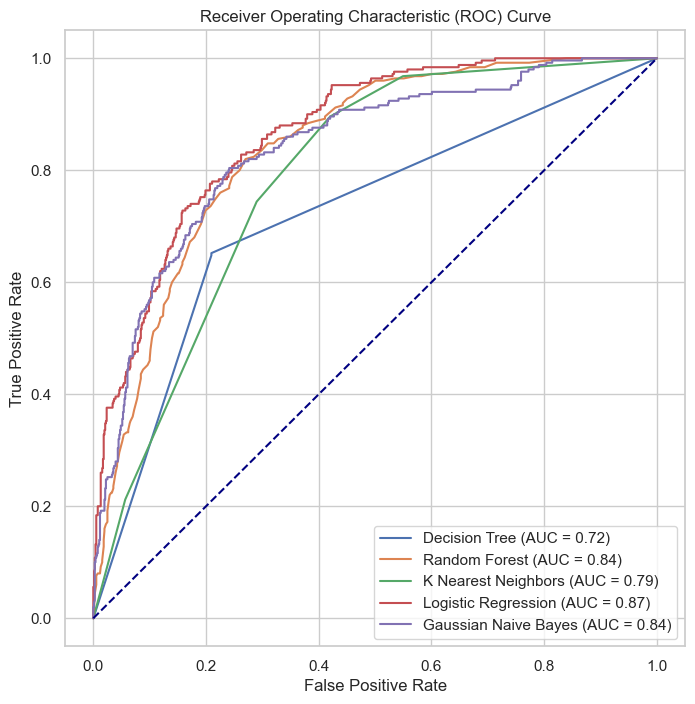

In [365]:
from sklearn.metrics import roc_curve, auc

# Create a plot with subplots
fig, ax = plt.subplots(figsize=(8, 8))

roc_curve_data = {}
all_pipeline = {}

# Loop through models to plot ROC curves
for model_name, classifier in models.items():
    # Assuming 'preprocessor', 'SMOTE', 'selection' are defined earlier
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('feature_importance', selection),
        ('classifier', classifier)
    ])

    # Fit the pipeline to training data
    pipeline.fit(X_train, y_train_encoded)

    # Get predicted probabilities for positive class
    y_score = pipeline.predict_proba(X_test)[:, 1]
    all_pipeline[model_name] = pipeline
    # Calculate ROC curve and AUC
    fpr, tpr, threshold= roc_curve(y_test_encoded, y_score)
    roc_auc = auc(fpr, tpr)

    roc_curve_df =pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr, 'Threshold': threshold})

    roc_curve_data[model_name] = roc_curve_df

    # Plot ROC curve
    ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line for reference
ax.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Set labels and title
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')

# Add legend in the lower right corner
ax.legend(loc='lower right')

# Show the plot
plt.show()

The ROC curve shows that the closer it is to the upper left corner,

the better the model's performance. This corner represents perfect classification with a 100% true positive rate and 0% false positive rate.

Logistic Regression performs the best, with its curve closest to the upper left corner and an AUC of 0.86.
Random Forest follows with an AUC of 0.84. K Nearest Neighbors has a moderate performance with an AUC of 0.84. Although Gaussian Naive Bayes also has an AUC of 0.72, its curve is further from the upper left corner, indicating it is less effective at distinguishing between classes. The Decision Tree has lower performance than Logistic Regression and Random Forest, but its exact AUC value is not provided. In summary, Logistic Regression is the best model, followed by Random Forest, K Nearest Neighbors, and Decision Tree, with Gaussian Naive Bayes being the least effective.


In [366]:
# Checking the threshold
roc_curve_data['Random Forest'].sample(10)

,False Positive Rate,True Positive Rate,Threshold
40,0.084321,0.436,0.680000
93,0.450593,0.928,0.190000
52,0.123847,0.544,0.566667
88,0.411067,0.892,0.230000
41,0.088274,0.444,0.670000
16,0.025033,0.192,0.890000
44,0.100132,0.464,0.640000
95,0.472991,0.944,0.170000
38,0.080369,0.408,0.700000
39,0.084321,0.428,0.690000


Confusion matrix to check performance of model


In [370]:
from sklearn.metrics import confusion_matrix
# Retrieve the 'Random Forest' pipeline
forest_pipeline = all_pipeline['Random Forest']  
# Make predictions using the pipeline
forest_y_pred = forest_pipeline.predict(X_test)  
# Calculate the confusion matrix
matrix = confusion_matrix(y_test_encoded, forest_y_pred)

# Print or use the 'matrix' variable as needed
print(matrix)

[[754   5]
 [249   1]]


<Axes: >

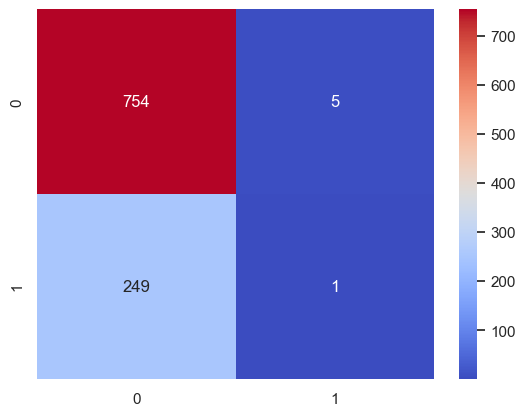

In [371]:
sns.heatmap(data=matrix, annot=True, fmt='d', cmap='coolwarm')

Adjusting the threshold


In [376]:


y_pred_proba = forest_pipeline.predict_proba(X_test)[:, 1]

# Set the threshold
threshold = 0.21

# Create binary predictions based on the threshold
binary_prediction = (y_pred_proba > threshold).astype(int)

# Calculate the confusion matrix with the threshold
threshold_matrix = confusion_matrix(y_test_encoded, binary_prediction)

# Print or use the 'threshold_matrix' variable as needed
print(threshold_matrix)

[[342 417]
 [ 73 177]]


Hyperparameter Tuning and Retraining with RandomizedSearchCV and GridSearchCV


GridSearchCV


In [377]:
from sklearn.model_selection import GridSearchCV

# the parameter grid
param_grid = {
    'classifier__n_estimators': [10, 30, 50],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

#  the grid search
grid_search = GridSearchCV(forest_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train_encoded)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical_pipeline',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer()),
                                                                                         ('log_transformation',
                                                                                          FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x000002CCB897B850>>)),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         Index(['tenure', 'Mon...
                                       ('feature_importance',
                                        SelectKBest(k=30,
                                                    score_func=<function mutual_info_classif at 0x000002CCB2A2B9C0>)),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_leaf': [1, 2],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [10, 30, 50]},
             scoring='accuracy')

In [378]:
# the best parameters

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 30}


Train model using best parameters


In [379]:
# Define the pipeline with the RandomForest classifier
forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('feature_importance', selection),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define the parameter grid with the best parameters
best_params = {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}

# Set the best parameters to the pipeline
forest_pipeline.set_params(**best_params)

# Fit the pipeline to the training data
forest_pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x000002CCB897B850>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges']...
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('feature_importance',
                 SelectKBest(k=30,
                             score_func=<function mutual_info_classif at 0x000002CCB2A2B9C0>)),
                ('classifier',
                 RandomForestClassifier(max_depth=20, min_samples_leaf=2,
                                        min_samples_split=5, n_estimators=200,
                                        random_state=42))])

Evaluate the trained model


In [380]:
# Make predictions using the new pipeline
forest_y_pred_best = forest_pipeline.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test_encoded, forest_y_pred_best))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       759
           1       0.58      0.74      0.65       250

    accuracy                           0.80      1009
   macro avg       0.74      0.78      0.76      1009
weighted avg       0.83      0.80      0.81      1009



Predict the New Data


In [381]:
prediction=forest_pipeline.predict(test_data)

In [382]:
from sklearn.preprocessing import LabelEncoder
prediction=label_encoder.inverse_transform(prediction)

In [383]:
test_data['Churn'] = prediction

In [384]:
test_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7613-LLQFO,Male,No,No,No,12,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55,Yes
1,4568-TTZRT,Male,No,No,No,9,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.80,No
2,9513-DXHDA,Male,No,No,No,27,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55,No
3,2640-PMGFL,Male,No,No,Yes,27,Yes,Yes,Fiber optic,No,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55,No
4,3801-HMYNL,Male,No,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7912-SYRQT,Female,No,No,No,7,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.10,552.95,Yes
1996,3557-HTYWR,Female,No,No,No,47,Yes,Yes,DSL,Yes,...,No,Yes,No,Yes,Two year,No,Mailed check,74.05,3496.30,No
1997,4816-JBHOV,Male,Yes,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,44.70,93.70,Yes
1998,8920-NAVAY,Male,Yes,No,No,62,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.75,7053.35,No


Model Persistence


In [386]:
import joblib
import os  

# Create the "models" directory if it doesn't exist
os.makedirs('../models', exist_ok=True)

# Save the trained model
joblib.dump(forest_pipeline, '../models/finished_model.joblib')

# Save the label encoder
joblib.dump(label_encoder, '../models/encoder.joblib')

['../models/encoder.joblib']

In [387]:
test_data.to_csv('../Training Data/training_data.csv', index=False)

### Deployment

Not Applicable
